<a href="https://colab.research.google.com/github/Sardaar2003/GFG_Data_Science_Course_Assignment/blob/main/Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
print(test.shape)
print(train.shape)

(418, 11)
(891, 12)


In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data Visualisation

Percentage of women survived :  74.20382165605095
Percentage of men survived :  18.890814558058924


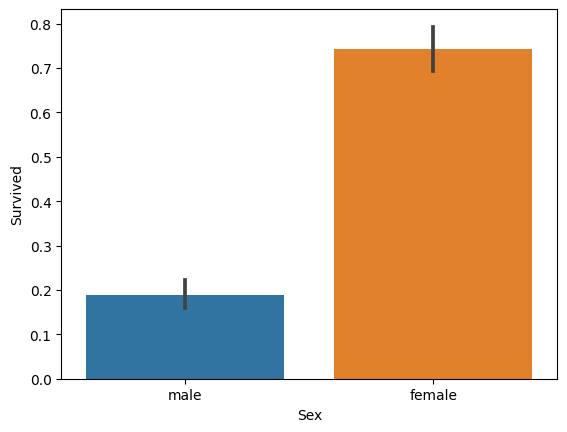

In [9]:
sns.barplot(x='Sex',y='Survived',data=train)

# Print Percentage
print('Percentage of women survived : ',train['Survived'][train['Sex']=='female'].value_counts(normalize=True)[1]*100)

print('Percentage of men survived : ',train['Survived'][train['Sex']=='male'].value_counts(normalize=True)[1]*100)

## P Class vs Survived

Percentage of PClass : 1 survived :  62.96296296296296
Percentage of PClass : 2 survived :  47.28260869565217
Percentage of PClass : 3 survived :  24.236252545824847


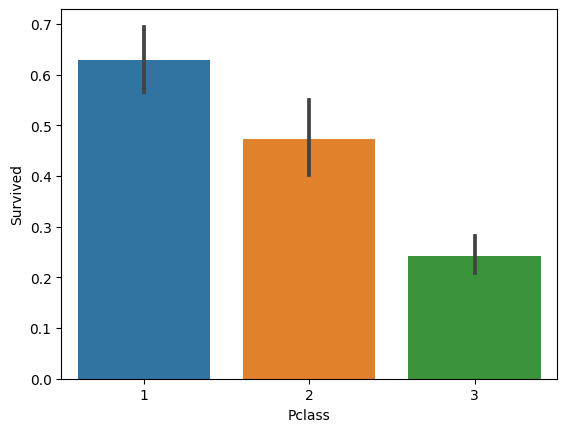

In [12]:
# P Class

sns.barplot(x='Pclass',y='Survived',data=train)

print('Percentage of PClass : 1 survived : ',train['Survived'][train['Pclass']==1].value_counts(normalize=True)[1]*100)
print('Percentage of PClass : 2 survived : ',train['Survived'][train['Pclass']==2].value_counts(normalize=True)[1]*100)
print('Percentage of PClass : 3 survived : ',train['Survived'][train['Pclass']==3].value_counts(normalize=True)[1]*100)

## Age vs Survival

In [13]:
train.Age=train.Age.fillna(-0.5)
test.Age=test.Age.fillna(-0.5)

In [14]:
bins=[-1,0,5,12,18,24,35,60,np.inf]
labels=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Senior']

In [15]:
train['AgeGroup']=pd.cut(train['Age'],bins,labels=labels)

In [16]:
test['AgeGroup']=pd.cut(test['Age'],bins,labels=labels)

<Axes: xlabel='AgeGroup', ylabel='Survived'>

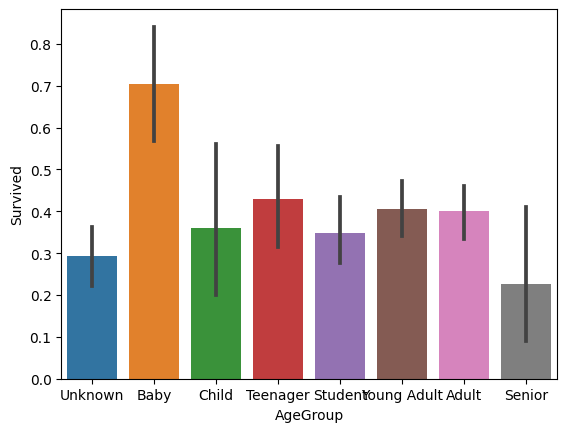

In [17]:
sns.barplot(x='AgeGroup',y='Survived',data=train)

In [18]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup'],
      dtype='object')

In [21]:
train.drop(['Ticket','Fare','Cabin'],axis=1,inplace=True)
test.drop(['Ticket','Fare','Cabin'],axis=1,inplace=True)

## Dealing with missing values

In [22]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       2
AgeGroup       0
dtype: int64

In [23]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [48]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
print('Number of People emabarking in Southampton (S) : ',end='')
southampton=train[train['Embarked']=='S'].shape[0]
print(southampton)
print('Number of People emabarking in Cherboug (C) : ',end='')
cher=train[train['Embarked']=='C'].shape[0]
print(cher)
print('Number of People emabarking in Queensland (Q) : ',end='')
Quens=train[train['Embarked']=='Q'].shape[0]
print(Quens)


Number of People emabarking in Southampton (S) : 644
Number of People emabarking in Cherboug (C) : 168
Number of People emabarking in Queensland (Q) : 77


In [28]:
train.Embarked=train.Embarked.fillna('S')

In [29]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
AgeGroup       0
dtype: int64

In [30]:
combine=[train,test]

In [42]:
for dataset in combine :
  dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [43]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,Mr


In [44]:
for dataset in combine :
  dataset['Title']=dataset['Title'].replace(['Lady','Capt','Col','Don','Dr','Major','Rev','Jonkheer','Dona'],'Rare')
  dataset['Title']=dataset['Title'].replace(['Lady','Sir','Countess'],'Royal')
  dataset['Title']=dataset['Title'].replace('Mlle','Miss')
  dataset['Title']=dataset['Title'].replace('Ms','Miss')
  dataset['Title']=dataset['Title'].replace('Mme','Mrs')

In [45]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,Mr


In [46]:
train[['Title','Survived']].groupby('Title',as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [47]:
title_map={'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Royal':5,'Rare':6}
for dataset in combine :
  dataset['Title']=dataset['Title'].map(title_map)
  dataset['Title']=dataset['Title'].fillna(0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,1


In [49]:
mr_age=train[train['Title']==1]['AgeGroup'].mode()
miss_age=train[train['Title']==2]['AgeGroup'].mode()
mrs_age=train[train['Title']==3]['AgeGroup'].mode()
master_age=train[train['Title']==4]['AgeGroup'].mode()
royal_age=train[train['Title']==5]['AgeGroup'].mode()
rare_age=train[train['Title']==6]['AgeGroup'].mode()

In [51]:
from sklearn.impute import SimpleImputer

In [58]:
imputer=SimpleImputer(missing_values='Unknown',strategy='most_frequent')

In [62]:
train[train['AgeGroup']=='Unknown'].nunique()

PassengerId    177
Survived         2
Pclass           3
Name           177
Sex              2
Age              1
SibSp            5
Parch            3
Embarked         3
AgeGroup         1
Title            5
dtype: int64

In [63]:
imputer.fit(train.iloc[:,9:10])
train.iloc[:,9:10]=imputer.transform(train.iloc[:,9:10].values)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [69]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,Q,Young Adult,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,S,Adult,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,Q,Senior,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,S,Young Adult,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,S,Student,3


In [70]:
test.iloc[:,8:9]

,AgeGroup
0,Young Adult
1,Adult
2,Senior
3,Young Adult
4,Student
...,...
413,Unknown
414,Adult
415,Adult
416,Unknown


In [72]:
imputer.fit(test.iloc[:,8:9])
test.iloc[:,8:9]=imputer.transform(test.iloc[:,8:9].values)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [73]:
test.AgeGroup.unique()

array(['Young Adult', 'Adult', 'Senior', 'Student', 'Teenager', 'Child',
       'Baby'], dtype=object)

In [68]:
train.AgeGroup.unique()

array(['Student', 'Adult', 'Young Adult', 'Baby', 'Teenager', 'Child',
       'Senior'], dtype=object)

In [75]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [76]:
transform=['Sex','AgeGroup','Embarked']
for i in transform :
  train[i]=le.fit_transform(train[i])

In [77]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,2,4,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,0,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,2,6,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,2,6,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,2,6,1


In [78]:
transform=['Sex','AgeGroup','Embarked']
for i in transform :
  test[i]=le.fit_transform(test[i])

In [79]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,1,6,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,2,0,3
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,1,3,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,2,6,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,2,4,3


## Machine Learning

In [80]:
x_train=train.drop(['PassengerId','Name','Survived'],axis=1)
y_train=train['Survived']
x_test=test.drop(['PassengerId','Name'],axis=1)


In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [83]:
output=pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':pred})

In [84]:
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [85]:
output.to_csv('Submission.csv',index=False)